In [1]:
library(Seurat)
library(tidyverse)
library(miloR)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: edgeR

Loading required package: limma



In [4]:

source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source(paste0("milo_cellbender.R"))


In [17]:
obj = qs::qread('_targets/objects/exp_labelled_other')
obj

An object of class Seurat 
25126 features across 32118 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

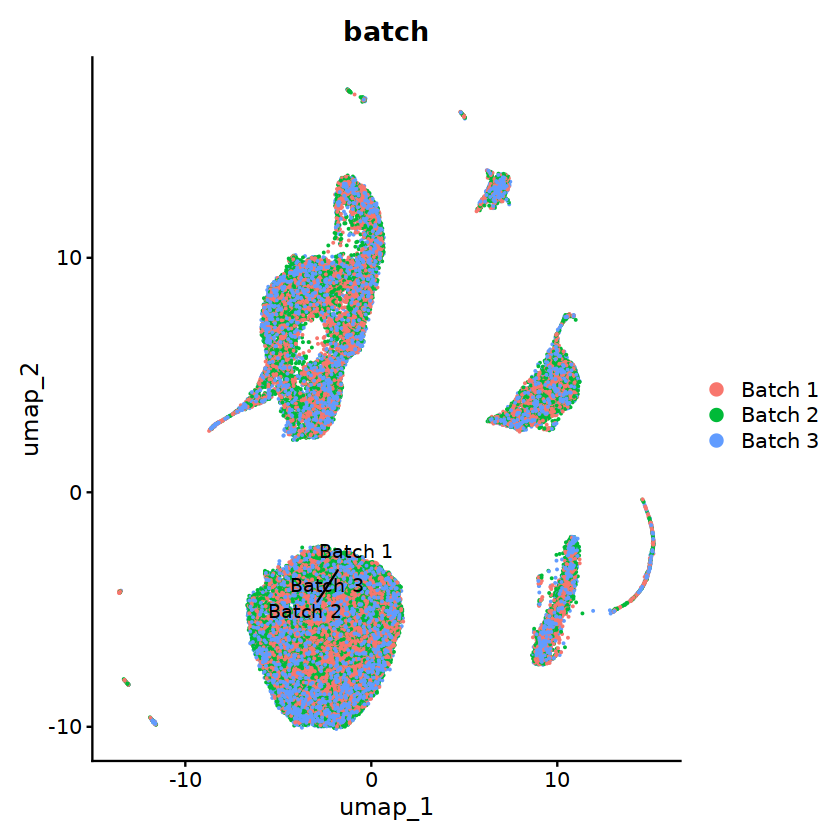

In [18]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='batch', label=T, repel = T)

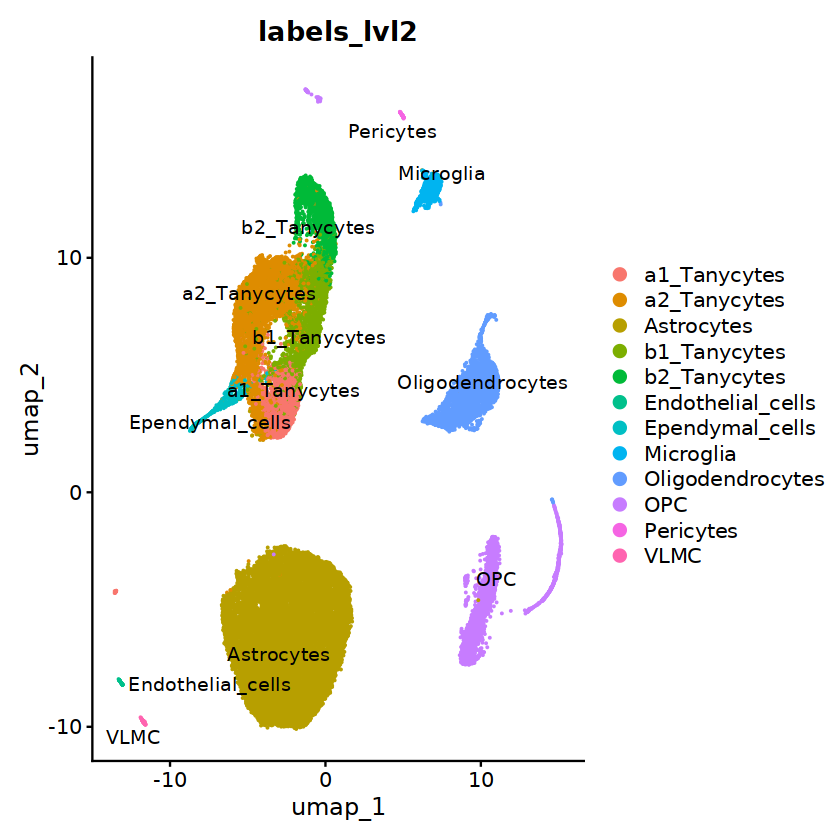

In [19]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='labels_lvl2', label=T, repel = T)

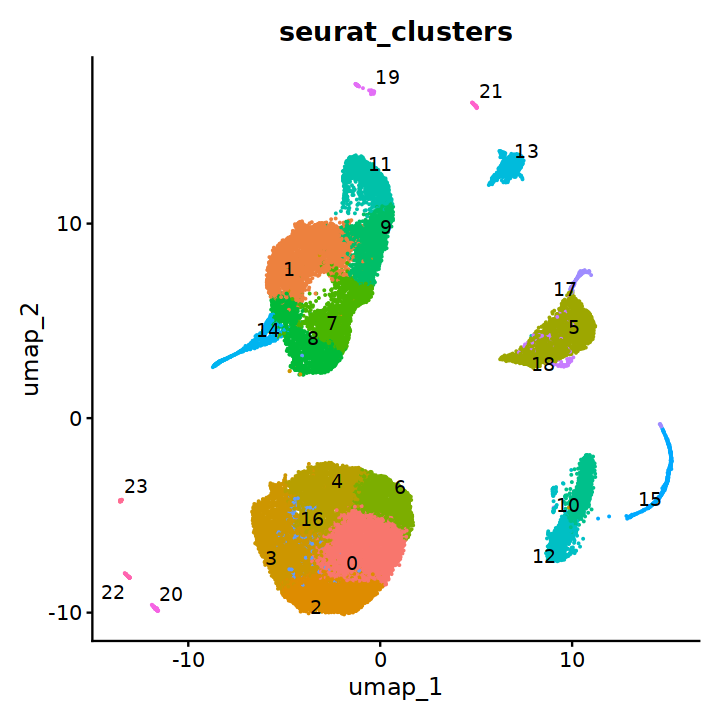

In [27]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
options(repr.plot.width = 6, repr.plot.height = 6)
DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T, repel = T) + NoLegend()

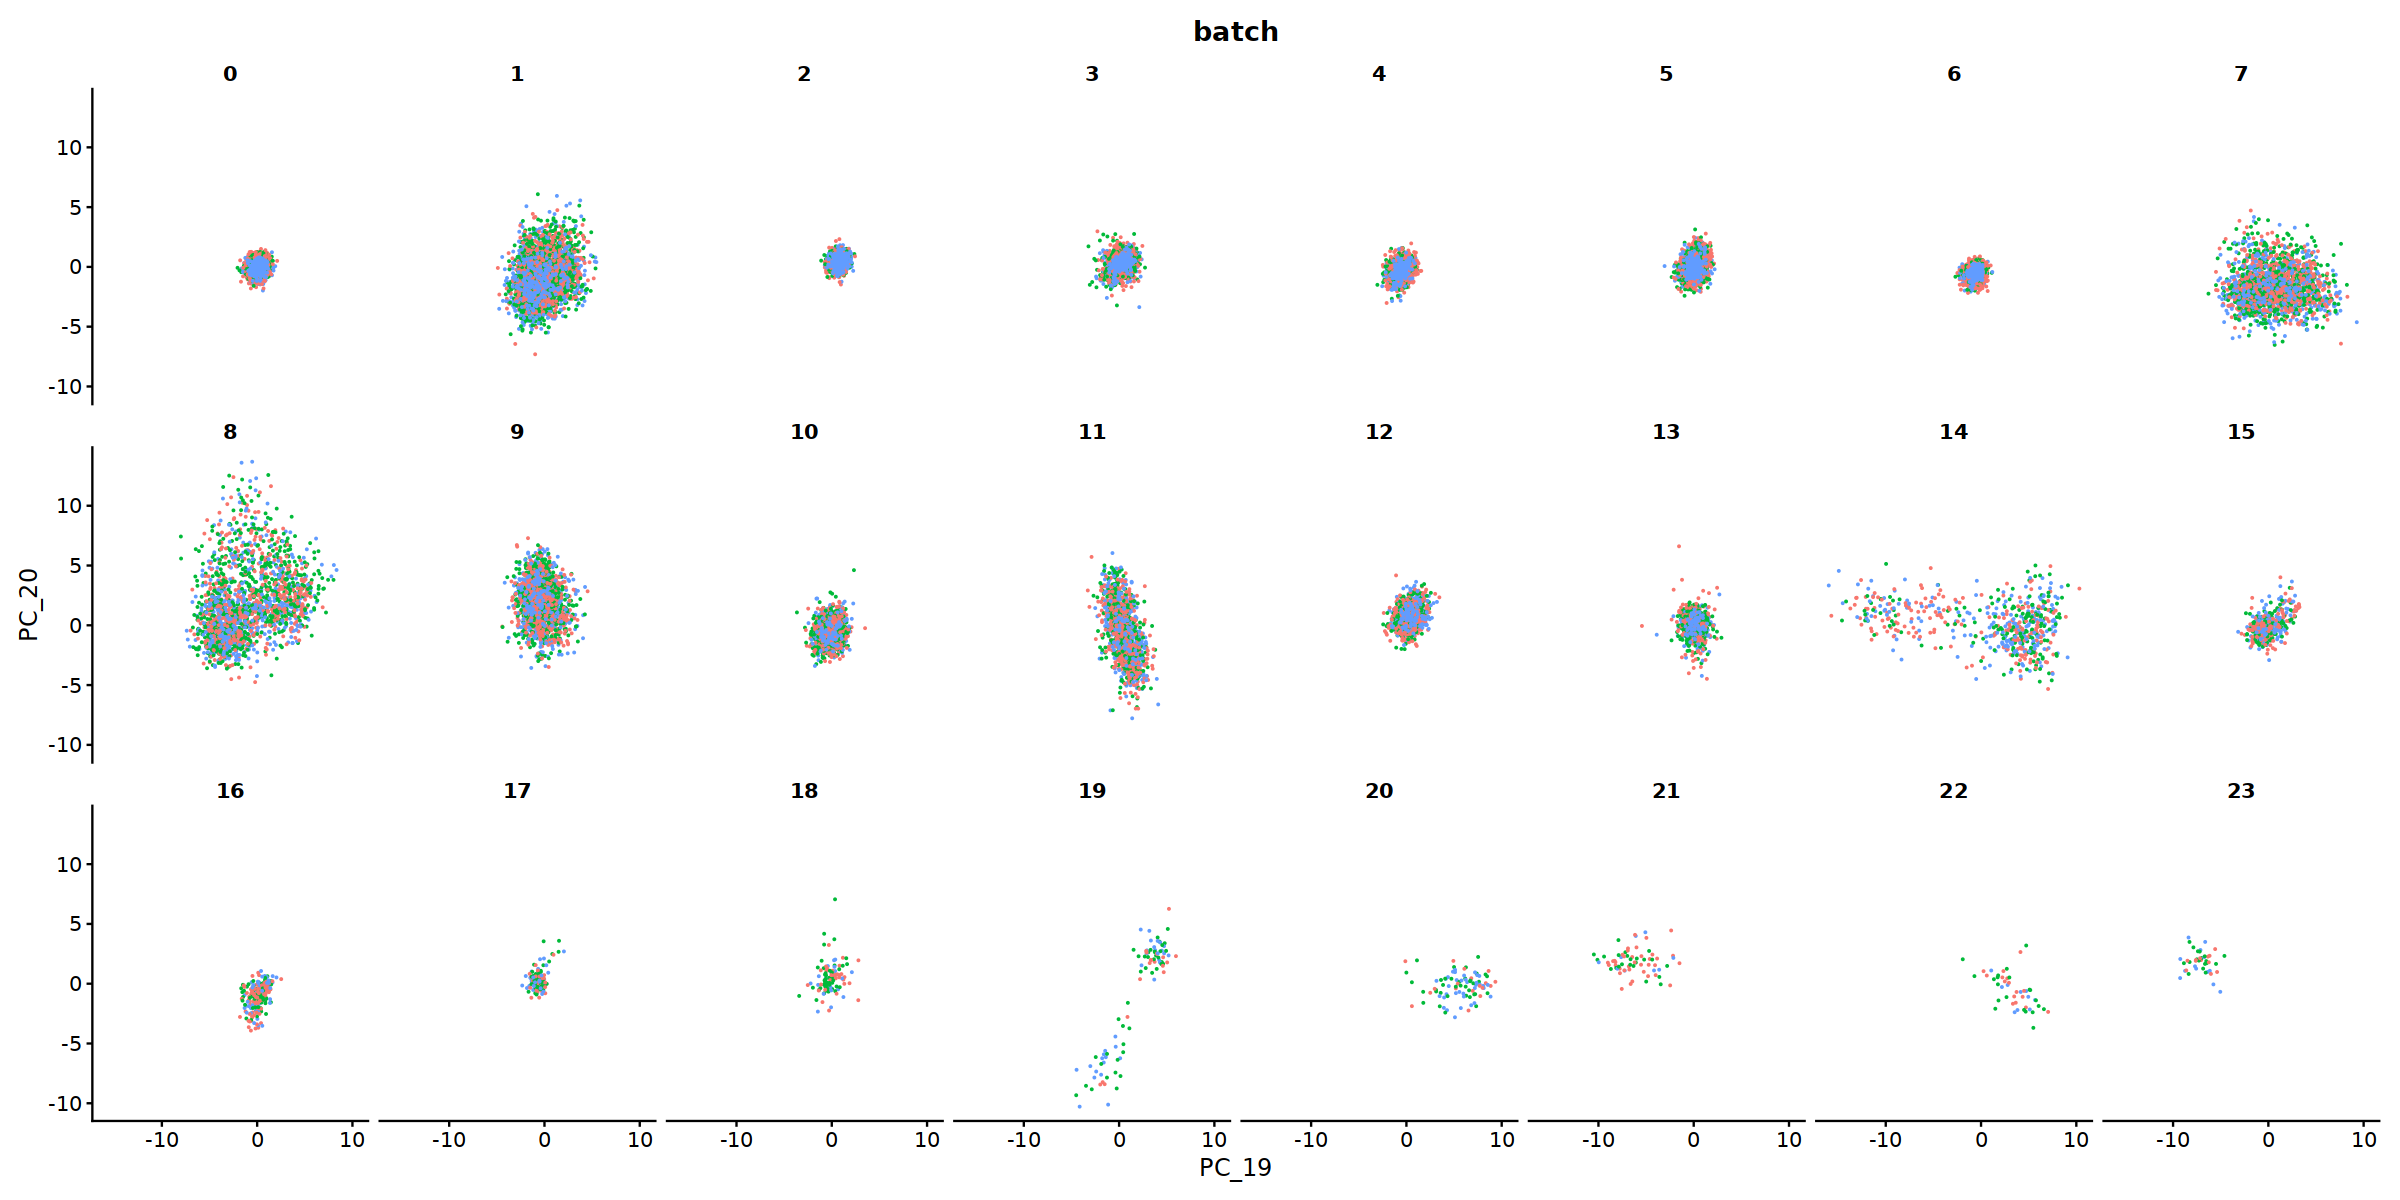

In [66]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
options(repr.plot.width = 20, repr.plot.height = 10)
DimPlot(obj, reduction = "pca", dims=c(19, 20), split.by='seurat_clusters', group.by='batch', label=F, repel = F, ncol=8) + NoLegend()

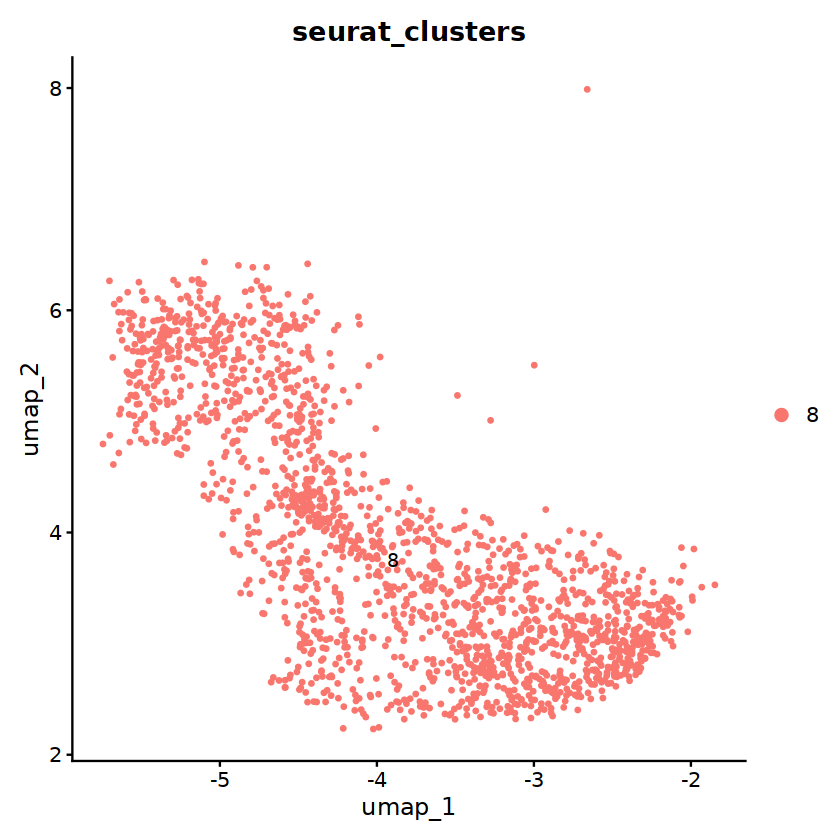

In [21]:
obj %>%
subset(subset = seurat_clusters == 8) %>%
DimPlot(reduction = "umap", group.by='seurat_clusters', label=T, repel = T)

In [37]:
obj@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Number of cells: 32118 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: integrated 

$umap
A dimensional reduction object with key umap_ 
 Number of dimensions: 2 
 Number of cells: 32118 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: integrated 


In [5]:
obj = obj %>%
    set_labels_to_lvl1 %>%
    #set_batch_to_lane %>% # do not set batch to lane for cluster splits
    prep_obj_for_milo_cb_v01 %>%
    sc_transform_fgf1 %>%
    run_sct_chaser

obj

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 23126 by 32118

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 424 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 23126 genes

Computing corrected count matrix for 23126 genes

Calculating gene attributes

Wall clock passed: Time difference of 13.64303 mins

Determine variable features

Regressing out batch

Centering data matrix

Getting residuals for block 1(of 7) for counts dataset

Getting residuals for block 2(of 7) for counts dataset

Getting residuals for block 3(of 7) for counts dataset

Getting residuals for block 4(of 7) for counts dataset

Getting residuals for block 5(of 7) for counts dataset

Getting residuals for block

An object of class Seurat 
48252 features across 32118 samples within 3 assays 
Active assay: SCT (23126 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

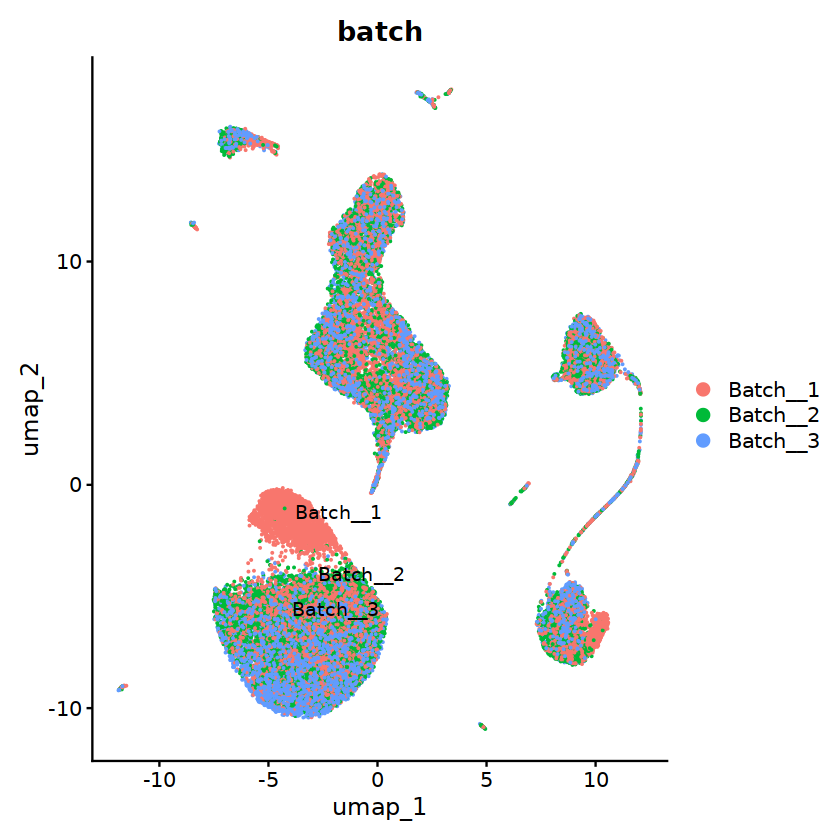

In [7]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='batch', label=T, repel = T)

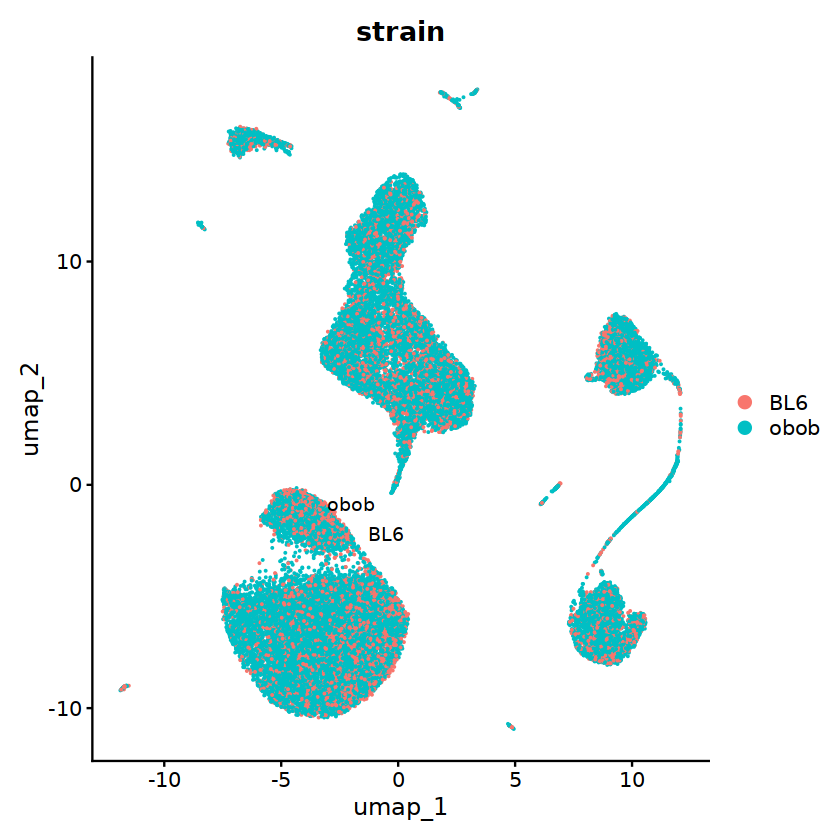

In [8]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='strain', label=T, repel = T)

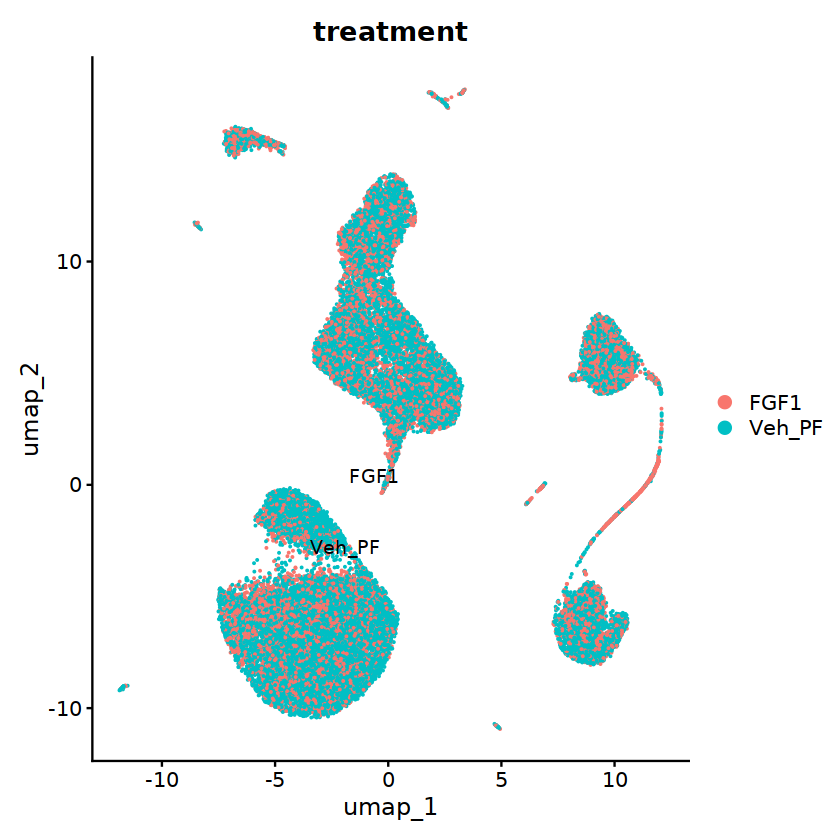

In [9]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='treatment', label=T, repel = T)

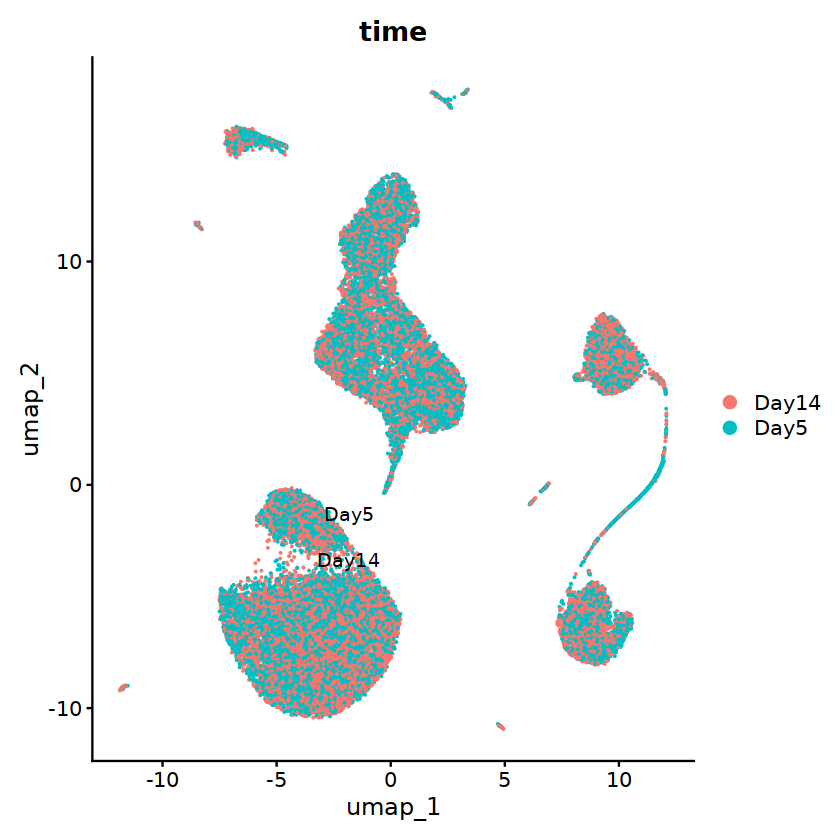

In [10]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='time', label=T, repel = T)

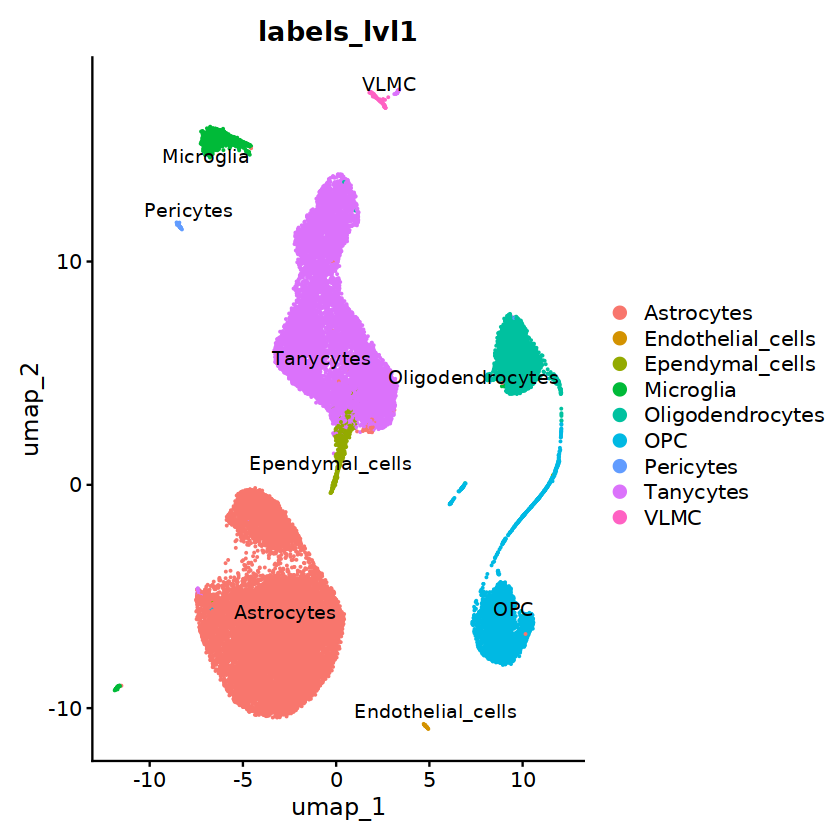

In [11]:
# Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T, repel = T)

In [12]:
obj@meta.data %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.75"            "labels_lvl1"                       
[37] "labels_lvl2"                        "labels"                            
[39] "hash.mcl.ID"                        "orig.batch"                        
[41] "group"                              "nCount_SCT"                        
[43] "nFeature_SCT"                       "SCT_snn_res.0.8"

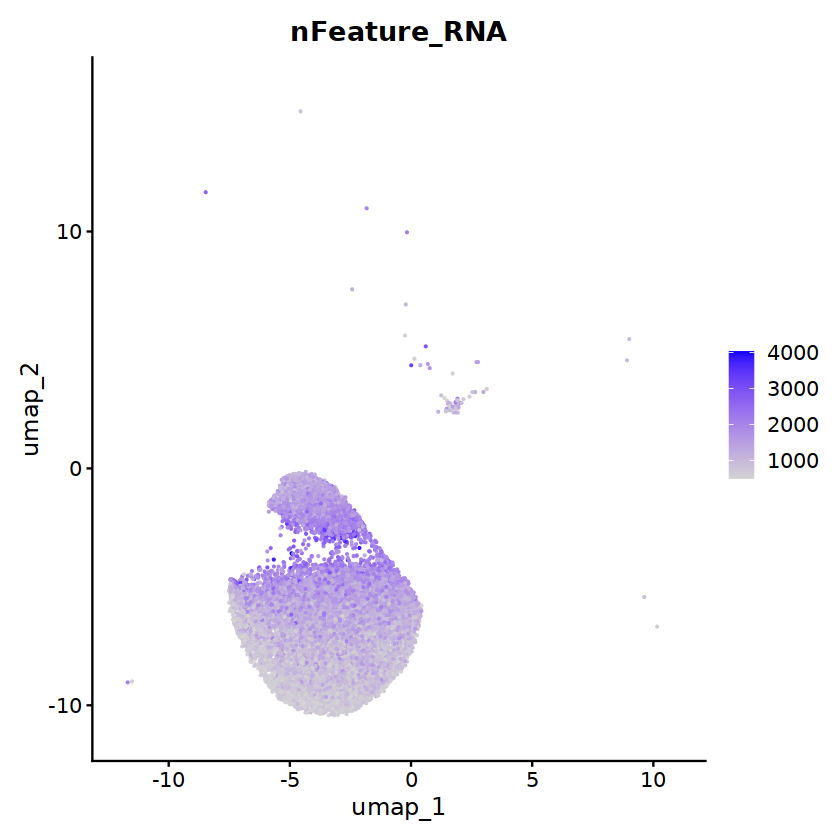

In [16]:
obj %>%
subset(subset = labels_lvl1 == 'Astrocytes') %>%
FeaturePlot(reduction = "umap", features='nFeature_RNA')

In [ ]:
obj_milo = qs::qread('_targets/objects/')